# Giovaniello et al. 2025 Reproduce & Simulation


In [8]:
# Simulate Figure 1h and 1i from Giovanniello et al. (Nature, 2025)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed
np.random.seed(50)


In [9]:
# PARAMETERS / MOUSE GROUPS AND SESSION

n_mice = {
    'control_non_deg': 7, # 7 mice in control, non-degraded group
    'control_deg': 7, # 7 mice in control, degraded group
    'stress_non_deg': 7, # 7 mice in stress, non-degraded group
    'stress_deg': 8 # 8 mice in stress, degraded group
}
sessions = np.arange(1, 5) # 4 training sessions

print(n_mice)
print(sessions)

{'control_non_deg': 7, 'control_deg': 7, 'stress_non_deg': 7, 'stress_deg': 8}
[1 2 3 4]


In [10]:
# Group means ± SDs from paper

training_data = {
    1: {'control_deg': (2.140, 0.619), # Day 1 mean and SD for control, degraded group from paper raw data
        'control_non_deg': (1.630, 0.755), # Day 1 mean and SD for control, non-degraded group from paper raw data
        'stress_deg': (2.235, 0.666), # Day 1 mean and SD for stress, degraded group from paper raw data
        'stress_non_deg': (2.626, 1.056)}, # Day 1 mean and SD for stress, non-degraded group from paper raw data
    2: {'control_deg': (5.727, 2.088), # Day 2 mean and SD for control, degraded group from paper raw data
        'control_non_deg': (6.240, 3.677), # Day 2 mean and SD for control, non-degraded group from paper raw data
        'stress_deg': (4.484, 2.296), # Day 2 mean and SD for stress, degraded group from paper raw data
        'stress_non_deg': (4.899, 2.223)}, # Day 2 mean and SD for stress, non-degraded group from paper raw data
    3: {'control_deg': (10.28, 2.460), # Day 3 mean and SD for control, degraded group from paper raw data
        'control_non_deg': (9.104, 2.770), # Day 3 mean and SD for control, non-degraded group from paper raw data
        'stress_deg': (10.20, 2.811), # Day 3 mean and SD for stress, degraded group from paper raw data
        'stress_non_deg': (10.98, 3.392)}, # Day 3 mean and SD for stress, non-degraded group from paper raw data
    4: {'control_deg': (15.37, 2.336), # Day 4 mean and SD for control, degraded group from paper raw data
        'control_non_deg': (16.69, 5.146), # Day 4 mean and SD for control, non-degraded group from paper raw data
        'stress_deg': (14.98, 4.992), # Day 4 mean and SD for stress, degraded group from paper raw data
        'stress_non_deg': (17.38, 6.069)} # Day 4 mean and SD for stress, non-degraded group from paper raw data
}

degradation_data = {
    'Control Non-degraded': {'mean': 15.371, 'sd': 5.401, 'n': 7}, 
    'Control Degraded': {'mean': 3.486, 'sd': 1.852, 'n': 7}, 
    'Stress Non-degraded': {'mean': 12.225, 'sd': 5.537, 'n': 7}, 
    'Stress Degraded': {'mean': 11.714, 'sd': 4.730, 'n': 8}
}


In [11]:
# SIMULATE TRAINING DATA (Fig. 1h)
# From the means ± SDs

training_sim = [] # to hold training data from simulation

for session, vals in training_data.items():
    for group, (mean, sd) in vals.items(): 
        rates = np.random.normal(mean, sd, n_mice[group]) # simulate press rates
        for r in rates: 
            stress = 'Control' if 'control' in group else 'Stress' # determine stress condition
            contingency = 'Degraded' if 'deg' in group and 'non' not in group else 'Non-degraded' # determine contingency condition
            training_sim.append({ # use dict to append to lst the different columns
                'Session': session,
                'PressRate': r,
                'Stress': stress,
                'Contingency': contingency
            })

training_df = pd.DataFrame(training_sim)
print(training_df.head(116))
print(training_df)

     Session  PressRate   Stress   Contingency
0          1   1.174142  Control      Degraded
1          1   2.120825  Control      Degraded
2          1   1.755645  Control      Degraded
3          1   1.233425  Control      Degraded
4          1   3.013995  Control      Degraded
..       ...        ...      ...           ...
111        4  22.492195   Stress  Non-degraded
112        4  16.379913   Stress  Non-degraded
113        4   9.586787   Stress  Non-degraded
114        4  18.594841   Stress  Non-degraded
115        4  22.529602   Stress  Non-degraded

[116 rows x 4 columns]
     Session  PressRate   Stress   Contingency
0          1   1.174142  Control      Degraded
1          1   2.120825  Control      Degraded
2          1   1.755645  Control      Degraded
3          1   1.233425  Control      Degraded
4          1   3.013995  Control      Degraded
..       ...        ...      ...           ...
111        4  22.492195   Stress  Non-degraded
112        4  16.379913   Stress  No

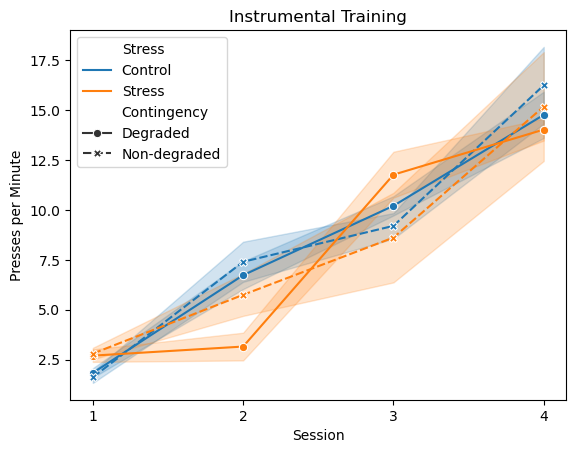

In [12]:
# PLOT SIMULATED TRAINING DATA

plt.figure 
sns.lineplot(
    data=training_df,
    x='Session', y='PressRate',
    hue='Stress', style='Contingency',
    markers=True, errorbar=('se')
)
plt.title("Instrumental Training")
plt.xticks([1, 2, 3, 4])
plt.ylabel("Presses per Minute")
plt.show()


In [13]:
# SIMULATE CONTINGENCY DEGRADATION DATA (Fig. 1i)
# From real means ± SDs

degradation_sim = [] # to hold lever press degradation data from simulation

for group, params in degradation_data.items(): 
    mean, sd, n = params['mean'], params['sd'], params['n'] 
    rates = np.random.normal(mean, sd, n) # simulate press rates for degradation groups
    stress = 'Control' if 'Control' in group else 'Stress' 
    contingency = 'Degraded' if 'Degraded' in group else 'Non-degraded'
    for r in rates:
        degradation_sim.append({ # use dict to append to lst the different columns
            'Group': group,
            'Stress': stress,
            'Contingency': contingency,
            'PressRate': r
        })

degradation_df = pd.DataFrame(degradation_sim) # create dataframe
degradation_df.head()
print(degradation_df) # sanity check 

                   Group   Stress   Contingency  PressRate
0   Control Non-degraded  Control  Non-degraded   6.136125
1   Control Non-degraded  Control  Non-degraded   6.817603
2   Control Non-degraded  Control  Non-degraded   9.427255
3   Control Non-degraded  Control  Non-degraded   9.120652
4   Control Non-degraded  Control  Non-degraded  25.136250
5   Control Non-degraded  Control  Non-degraded   9.369524
6   Control Non-degraded  Control  Non-degraded  20.072113
7       Control Degraded  Control      Degraded   4.873098
8       Control Degraded  Control      Degraded   4.800054
9       Control Degraded  Control      Degraded   4.071509
10      Control Degraded  Control      Degraded   2.044747
11      Control Degraded  Control      Degraded   2.493399
12      Control Degraded  Control      Degraded   1.312063
13      Control Degraded  Control      Degraded   1.754757
14   Stress Non-degraded   Stress  Non-degraded   6.134080
15   Stress Non-degraded   Stress  Non-degraded  12.0699

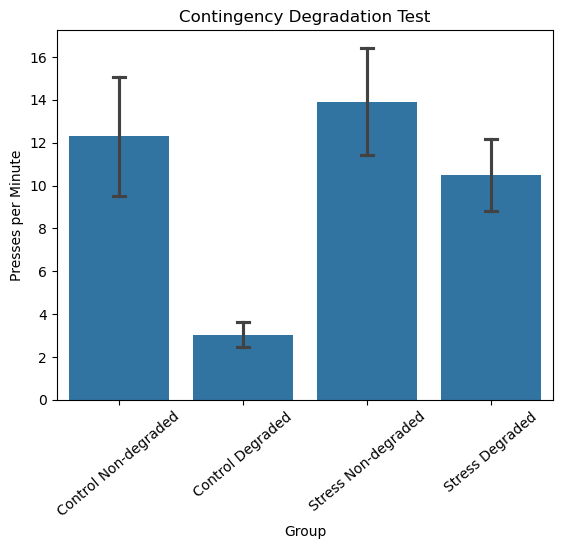

In [14]:
# PLOT SIMULATED CONTINGENCY DEGRADATION DATA

plt.figure
sns.barplot(
    data=degradation_df, x='Group', y='PressRate',
    capsize=.1, errorbar='se'
)
plt.title("Contingency Degradation Test")
plt.ylabel("Presses per Minute")
plt.xticks(rotation=40)
plt.show()
